In [262]:
import numpy as np
import pandas as pd

# generate the first 2-d Gaussian distribution
x1=np.random.normal(0,2,10000)
y1=np.random.normal(0,2,10000)
p1=pd.DataFrame({'x':x1,'y':y1})
print(p1)

# generate the second 2-d Gaussian distribution
x2=np.random.normal(10,2,10000)
y2=np.random.normal(10,2,10000)
p2=pd.DataFrame({'x':x2,'y':y2})

             x         y
0     2.512804  0.164339
1     0.577623  1.291929
2    -0.330365  1.097782
3    -1.974797 -1.379782
4     1.731013 -1.207651
5     2.581939  1.112718
6     0.186997  3.313236
7     0.702209 -0.261498
8     2.399469 -1.604508
9    -2.020159  0.779772
10   -1.895008 -3.124552
11    0.546912 -0.128875
12   -1.083448  0.521396
13   -1.167729  0.760346
14    0.340331  1.507413
15   -3.846538 -1.039780
16    0.618876  1.983864
17   -0.165018 -0.912891
18    1.145215  2.853302
19    1.436818  1.091064
20    0.198507  0.984500
21   -1.300104 -2.038395
22    1.178496 -3.737890
23   -0.042268  1.317660
24    0.942220  2.667537
25    2.229968 -2.500827
26    1.517526  0.334712
27   -0.654180 -0.443782
28    2.111592  0.900630
29    0.757781 -1.289873
...        ...       ...
9970 -3.285791 -0.154733
9971  1.716550 -0.204193
9972 -1.512311  1.835243
9973  2.973699  2.224490
9974 -1.564119 -1.400967
9975 -0.923349  3.835639
9976 -0.327499  0.334895
9977  0.334566  1.083699


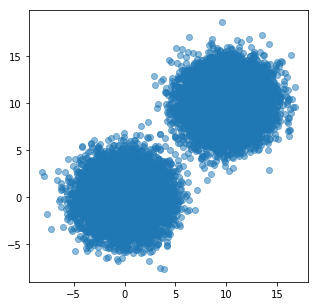

In [263]:
# combine the datasets p1 and p2
import matplotlib.pyplot as plt
%matplotlib inline
p=pd.concat([p1,p2], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.scatter(p['x'], p['y'], alpha=0.5)

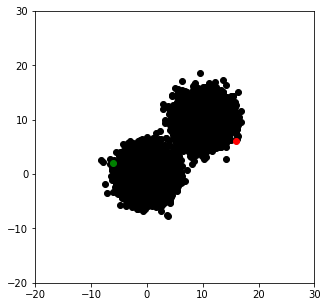

In [264]:
np.random.seed(200)
k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(-10, 30), np.random.randint(-10, 30)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(p['x'], p['y'], color='k')
colmap = {1: 'r', 2: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-20, 30)
plt.ylim(-20, 30)
plt.show()

          x         y  distance_from_1  distance_from_2  closest color
0  2.512804  0.164339        14.695557         8.708472        2     g
1  0.577623  1.291929        16.125001         6.615624        2     g
2 -0.330365  1.097782        17.050295         5.740972        2     g
3 -1.974797 -1.379782        19.430762         5.255967        2     g
4  1.731013 -1.207651        15.986063         8.370041        2     g


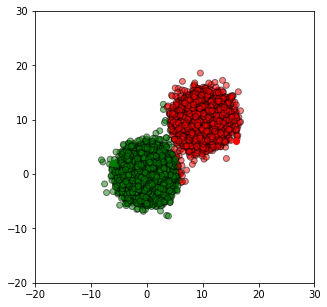

In [265]:
## Assignment Stage

def assignment(p, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        p['distance_from_{}'.format(i)] = (
            np.sqrt(
                (p['x'] - centroids[i][0]) ** 2
                + (p['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    p['closest'] = p.loc[:, centroid_distance_cols].idxmin(axis=1)
    p['closest'] = p['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    p['color'] = p['closest'].map(lambda x: colmap[x])
    return p

p = assignment(p, centroids)
print(p.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(p['x'], p['y'], color=p['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-20, 30)
plt.ylim(-20, 30)
plt.show()

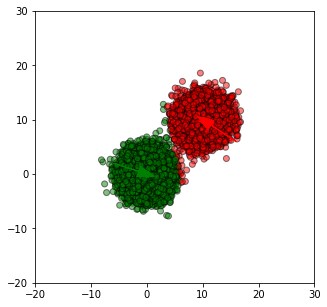

In [266]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(p[p['closest'] == i]['x'])
        centroids[i][1] = np.mean(p[p['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(p['x'], p['y'], color=p['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-20, 30)
plt.ylim(-20, 30)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])


plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Figures/Iteration1.png")

In [267]:
## Create a function to repeate the reassignment function and centroid update function
def iteration(p, centroids):
    iterations=1
    while True:
        iterations = iterations + 1
        closest_centroids = p['closest'].copy(deep=True)   
        p = assignment(p, centroids)
        centroids = update(centroids)

        fig = plt.figure(figsize=(5, 5))
        ax = plt.axes()
        plt.scatter(p['x'], p['y'], color=p['color'], alpha=0.5, edgecolor='k')
        for i in centroids.keys():
            plt.scatter(*centroids[i], color=colmap[i])
        plt.xlim(-20, 30)
        plt.ylim(-20, 30)
        for i in old_centroids.keys():
            old_x = old_centroids[i][0]
            old_y = old_centroids[i][1]
            dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
            dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
            ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
        
        plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Figures/Iteration{iterations}.png".format(iterations=iterations))

        if closest_centroids.equals(p['closest']):
            break

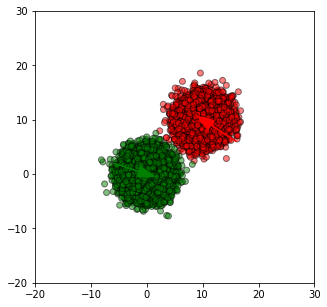

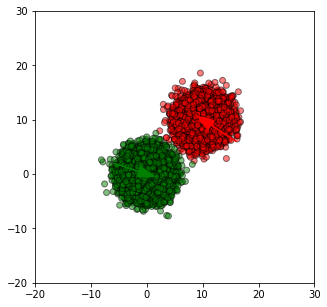

In [268]:
## Call the iteration functions 
iteration(p, centroids)